# Maternal Health

In [6]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv(r'E:\Projects\Maternal-Mortality-Risk-Assessment-and-Intervention-Project\Data\Maternal Health Risk Data Set.csv')
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


### Data Exploration

In [3]:
class DataExplorer:
    def __init__(self, data):
        self.data = data
        self.shape = data.shape
        self.data_types = data.dtypes
        self.missing_values = data.isnull().sum()
        self.duplicate_rows = data.duplicated().sum()
        
    def summary(self):
        print("Dataset Shape:")
        print(self.shape)
        print("\nData Types:")
        print(self.data_types)
        print("\nMissing Values:")
        print(self.missing_values)
        print("\nDuplicate Rows:")
        print(self.duplicate_rows)

    def summary_statistics(self):
        numeric_data = self.data.select_dtypes(include='number')
        statistics = numeric_data.describe()
        print("\nSummary Statistics for Numerical Columns:")
        print(statistics)
        
    def unique_values(self):
        categorical_data = self.data.select_dtypes(exclude='number')
        unique_values = {}
        for column in categorical_data.columns:
            unique_values[column] = {
                'Unique Values': categorical_data[column].unique(),
                'Value Counts': categorical_data[column].value_counts()
            }
        print("\nUnique Values and Value Counts for Categorical Columns:")
        for column, values in unique_values.items():
            print(f"Column: {column}")
            print(f"Unique Values: {values['Unique Values']}")
            print(f"Value Counts:\n{values['Value Counts']}\n")


# Creating an instance of the DataExplorer class and explore the dataset
data_explorer = DataExplorer(df)
data_explorer.summary()
data_explorer.summary_statistics()
data_explorer.unique_values()

Dataset Shape:
(1014, 7)

Data Types:
Age              int64
SystolicBP       int64
DiastolicBP      int64
BS             float64
BodyTemp       float64
HeartRate        int64
RiskLevel       object
dtype: object

Missing Values:
Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

Duplicate Rows:
562

Summary Statistics for Numerical Columns:
               Age   SystolicBP  DiastolicBP           BS     BodyTemp  \
count  1014.000000  1014.000000  1014.000000  1014.000000  1014.000000   
mean     29.871795   113.198225    76.460552     8.725986    98.665089   
std      13.474386    18.403913    13.885796     3.293532     1.371384   
min      10.000000    70.000000    49.000000     6.000000    98.000000   
25%      19.000000   100.000000    65.000000     6.900000    98.000000   
50%      26.000000   120.000000    80.000000     7.500000    98.000000   
75%      39.000000   120.000000    90.000000     8.00000

- The dataset consists of 1,014 rows and 7 columns.

- The columns have the following data types:
  - Age, SystolicBP, DiastolicBP, and HeartRate are of integer type.
  - BS (Blood Sugar) and BodyTemp (Body Temperature) are of float type.
  - RiskLevel is of object type, representing categorical data.

- There are no missing values in any of the columns; all columns have complete data.

- The summary statistics provide valuable insights into the key numerical features of our dataset. The mean age of pregnant women in the dataset is approximately 29.87 years, with a standard deviation of 13.47, indicating a relatively wide age range. Systolic blood pressure (SystolicBP) has an average value of 113.20 mmHg, while diastolic blood pressure (DiastolicBP) averages around 76.46 mmHg. These blood pressure measures exhibit variation, as seen in their respective standard deviations. Blood sugar levels (BS) have an average molar concentration of 8.73 mmol/L, with a moderate standard deviation of 3.29, suggesting variability in glucose levels. Body temperature (BodyTemp) demonstrates a consistent value of 98.67°F, and the heart rate (HeartRate) has an average of 74.30 bpm, indicating a typical resting heart rate.

For the "RiskLevel" column has three unique values: "low risk," "mid risk," and "high risk."

- "low risk" occurs 406 times.
- "mid risk" occurs 336 times.
- "high risk" occurs 272 times.


### Data Visualization

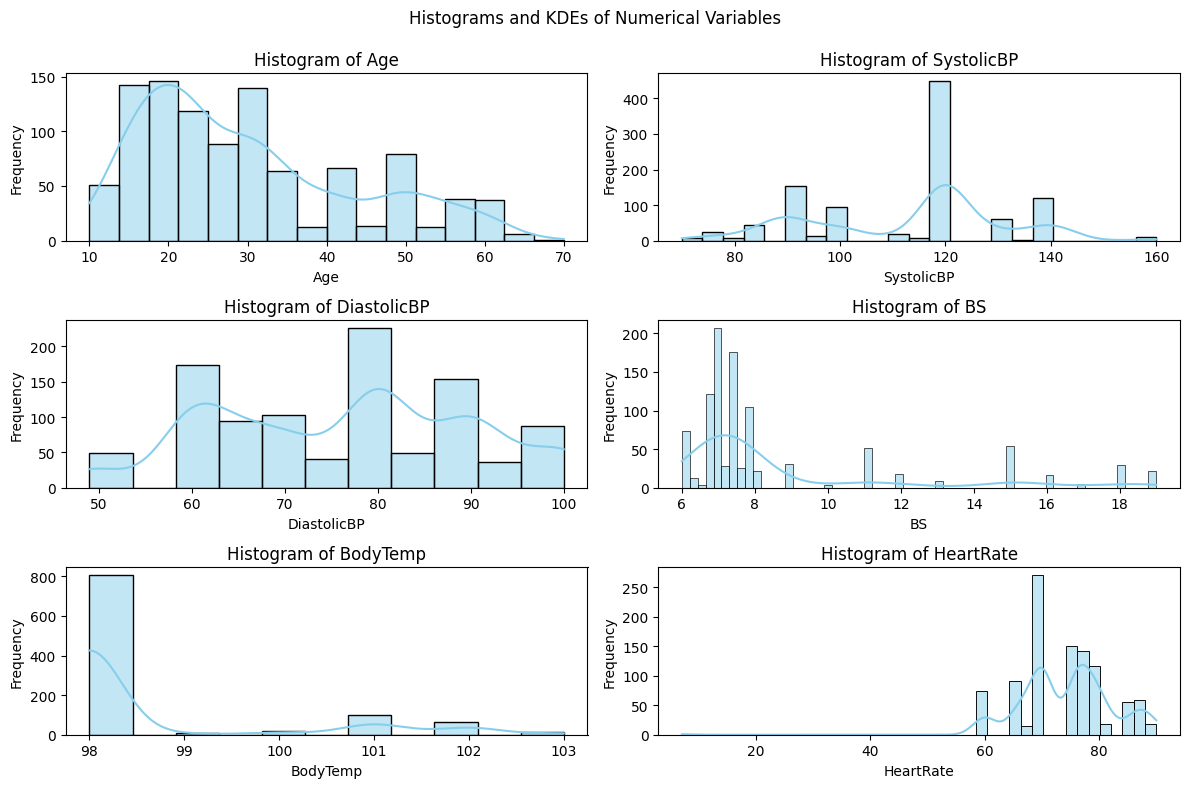

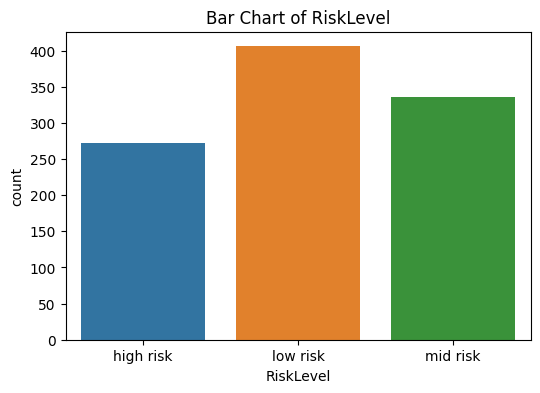

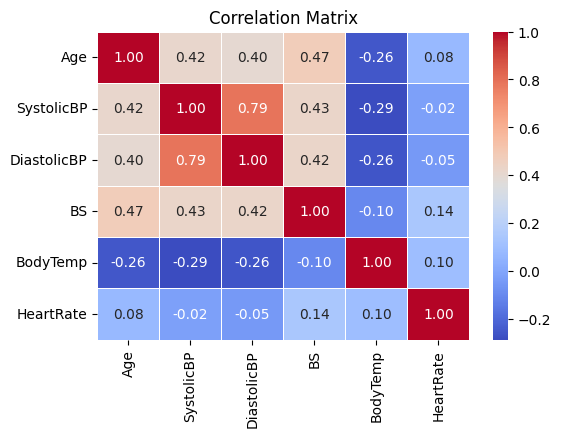

In [4]:
class DataVisualizer:
    def __init__(self, data):
        self.data = data

    def create_histograms_and_kde_grid(self):
        numeric_data = self.data.select_dtypes(include='number')
        num_cols = numeric_data.columns
        num_plots = len(num_cols)

        num_rows = 3
        num_cols_per_row = 2
        num_figures = (num_plots + num_cols_per_row - 1) // num_cols_per_row

        fig, axes = plt.subplots(num_figures, num_cols_per_row, figsize=(12, 8))
        fig.suptitle('Histograms and KDEs of Numerical Variables')

        for i, col in enumerate(num_cols):
            row = i // num_cols_per_row
            col_index = i % num_cols_per_row

            ax = axes[row, col_index]
            sns.histplot(self.data[col], kde=True, color='skyblue', ax=ax)
            ax.set_title(f'Histogram of {col}')
            ax.set_xlabel(col)
            ax.set_ylabel('Frequency')

        plt.tight_layout()
        plt.subplots_adjust(top=0.9)
        plt.show()

    def create_bar_chart(self, categorical_variable):
        if categorical_variable not in self.data.columns:
            print(f"{categorical_variable} is not a valid categorical variable in the dataset.")
            return

        plt.figure(figsize=(6, 4))
        sns.countplot(data=self.data, x=categorical_variable, palette='viridis')
        plt.title(f'Bar Chart of {categorical_variable}')
        plt.xlabel(categorical_variable)
        sns.countplot(x=categorical_variable, data=df)
        plt.show()

    def create_correlation_matrix(self):
        numeric_data = self.data.select_dtypes(include='number')
        correlation_matrix = numeric_data.corr()

        plt.figure(figsize=(6, 4))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
        plt.title('Correlation Matrix')
        plt.show()

data_visualizer = DataVisualizer(df)
data_visualizer.create_histograms_and_kde_grid()
data_visualizer.create_bar_chart('RiskLevel')
data_visualizer.create_correlation_matrix()

Histograms:

- Age Histogram: The age distribution shows that a majority of pregnant individuals fall within the 20 to 30-year age range, with relatively fewer younger or older individuals. This suggests that the dataset predominantly contains observations from this age group.

- Systolic Blood Pressure (SystolicBP) Histogram: SystolicBP appears to follow a relatively normal distribution, with a peak around 120-130 mmHg. This suggests that a significant proportion of individuals have systolic blood pressure within this range.

- Diastolic Blood Pressure (DiastolicBP) Histogram: DiastolicBP exhibits a distribution with a peak around 70-80 mmHg. It appears that most individuals have diastolic blood pressure within this range.

- Blood Sugar (BS) Histogram: The BS distribution shows that most individuals have blood sugar levels concentrated around 6-9 mmol/L, with a peak around 7.5 mmol/L. This indicates a central tendency in the dataset's blood sugar levels.

- Body Temperature (BodyTemp) Histogram: BodyTemp appears to have a constant value, around 98.0°F, suggesting that the dataset may not have much variability in body temperature.

- Heart Rate (HeartRate) Histogram: HeartRate follows a relatively normal distribution, with a peak around 75-80 bpm. This suggests that most individuals have resting heart rates within this range.

- RiskLevel Bar Chart: The bar chart for 'RiskLevel' reveals the distribution of risk levels. 'Low risk' has the highest count, followed by 'mid risk' and 'high risk.' This indicates that the dataset is imbalanced, with more individuals classified as 'low risk.'

Correlation Matrix:

- The correlation matrix provides insights into the relationships between numerical variables. There is a strong corelation between systolic and diastolic blood pressure. 

### Modelling

In [7]:
class RiskAssessmentModel:
    def __init__(self, data):
        self.data = data
        self.features = None
        self.target = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.models = {
            'Random Forest': RandomForestClassifier(random_state=42),
            'Logistic Regression': LogisticRegression(random_state=42),
            'Support Vector Machine': SVC(random_state=42)
        }

    def preprocess_data(self):
        # Split the data into features and target
        self.features = self.data.drop(columns=['RiskLevel'])
        self.target = self.data['RiskLevel']

        # Encode categorical variables (if any) and scale numerical features
        self.features = pd.get_dummies(self.features)  # Example one-hot encoding
        scaler = StandardScaler()
        self.features = scaler.fit_transform(self.features)

        # Split the data into training and testing sets
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            self.features, self.target, test_size=0.2, random_state=42
        )

    def train_models(self):
        for model_name, model in self.models.items():
            # Create and train a classification model
            model.fit(self.X_train, self.y_train)

    def evaluate_models(self):
        results = {}
        for model_name, model in self.models.items():
            # Make predictions on the test set
            y_pred = model.predict(self.X_test)

            # Evaluate the model's performance
            accuracy = accuracy_score(self.y_test, y_pred)
            classification_rep = classification_report(self.y_test, y_pred)
            conf_matrix = confusion_matrix(self.y_test, y_pred)

            results[model_name] = {
                'accuracy': accuracy,
                'classification_report': classification_rep,
                'confusion_matrix': conf_matrix
            }

        return results

    def build_and_evaluate_models(self):
        # Preprocess the data
        self.preprocess_data()

        # Train the models
        self.train_models()

        # Evaluate the models
        results = self.evaluate_models()

        return results

# Example usage:
# Assuming you have your dataset in a DataFrame named 'df'
risk_model = RiskAssessmentModel(df)
model_results = risk_model.build_and_evaluate_models()

for model_name, results in model_results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {results['accuracy']}")
    print("Classification Report:")
    print(results['classification_report'])
    print("Confusion Matrix:")
    print(results['confusion_matrix'])
    print("\n")


Model: Random Forest
Accuracy: 0.812807881773399
Classification Report:
              precision    recall  f1-score   support

   high risk       0.87      0.85      0.86        47
    low risk       0.86      0.76      0.81        80
    mid risk       0.74      0.84      0.79        76

    accuracy                           0.81       203
   macro avg       0.82      0.82      0.82       203
weighted avg       0.82      0.81      0.81       203

Confusion Matrix:
[[40  1  6]
 [ 3 61 16]
 [ 3  9 64]]


Model: Logistic Regression
Accuracy: 0.6502463054187192
Classification Report:
              precision    recall  f1-score   support

   high risk       0.70      0.85      0.77        47
    low risk       0.62      0.89      0.73        80
    mid risk       0.68      0.28      0.39        76

    accuracy                           0.65       203
   macro avg       0.67      0.67      0.63       203
weighted avg       0.66      0.65      0.61       203

Confusion Matrix:
[[40  2  5]
